# Playground

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fp = "data.csv"
df = pd.read_csv(fp)
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [47]:
def plot_eeg_signal(x, y, metadata):
    title = metadata["title"]
    label = metadata["label"]
    plt.plot(x, y)
    plt.title(f"EEG Signal for {title} | Label: {label}")
    plt.xlabel("Point")
    plt.ylabel("Voltage")
    plt.show()

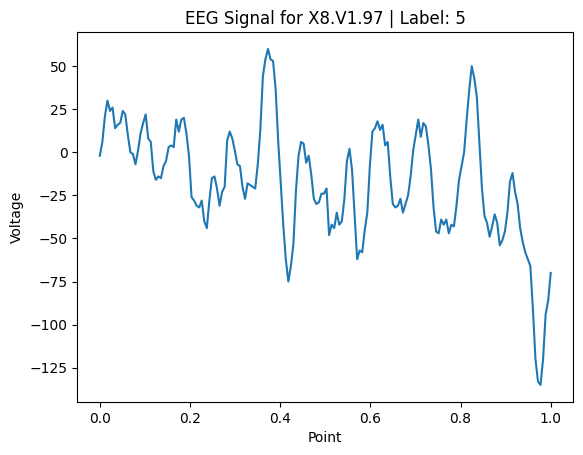

In [61]:
sample_row = df.sample(n=1)
sample_metadata = {
    "title": sample_row["Unnamed"].item(), 
    "label": sample_row["y"].item()
    }
sample_data = np.array(sample_row.loc[:, ~df.columns.isin(["Unnamed", "y"])])
sample_data = sample_data.reshape(sample_data.shape[1])
sample_x = np.linspace(0, 1, sample_data.shape[0])
plot_eeg_signal(x=sample_x, y=sample_data, metadata=sample_metadata)

## ECGS with Seizures

In [66]:
seizures = df.loc[df['y'] == 1]
seizures.shape

(2300, 180)

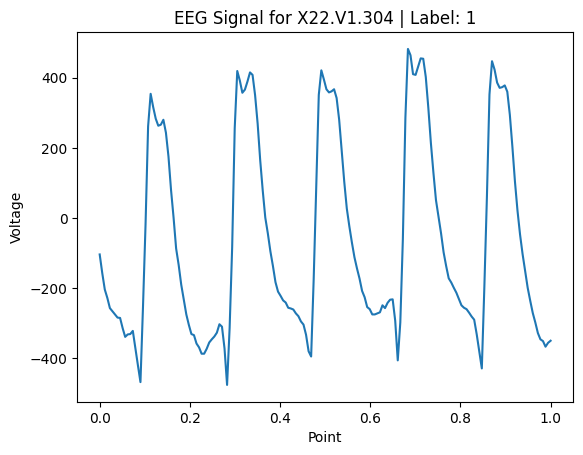

In [67]:
sample_row = seizures.sample(n=1)
sample_metadata = {
    "title": sample_row["Unnamed"].item(), 
    "label": sample_row["y"].item()
    }
sample_data = np.array(sample_row.loc[:, ~seizures.columns.isin(["Unnamed", "y"])])
sample_data = sample_data.reshape(sample_data.shape[1])
sample_x = np.linspace(0, 1, sample_data.shape[0])
plot_eeg_signal(x=sample_x, y=sample_data, metadata=sample_metadata)

## ECGS Without Seizures

In [68]:
non_seizures = df.loc[df['y'] != 1]
non_seizures.shape

(9200, 180)

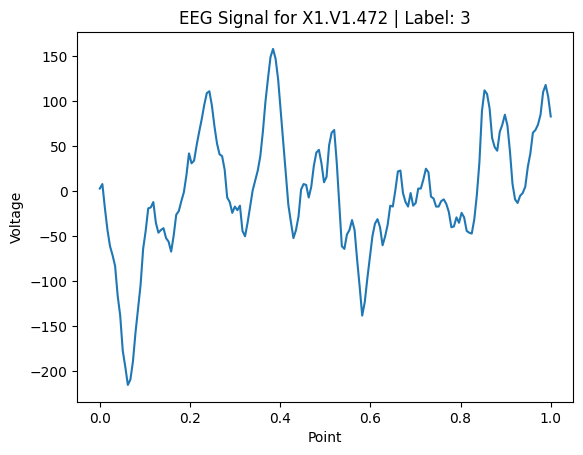

In [70]:
sample_row = non_seizures.sample(n=1)
sample_metadata = {
    "title": sample_row["Unnamed"].item(), 
    "label": sample_row["y"].item()
    }
sample_data = np.array(sample_row.loc[:, ~non_seizures.columns.isin(["Unnamed", "y"])])
sample_data = sample_data.reshape(sample_data.shape[1])
sample_x = np.linspace(0, 1, sample_data.shape[0])
plot_eeg_signal(x=sample_x, y=sample_data, metadata=sample_metadata)